In [3]:
import numpy as np
import scipy.stats as ss
import pylab as plt
import os
import sys

%matplotlib notebook

In [4]:
mu = 1
sigma = 1

x = ss.norm(mu, sigma).rvs(100)

In [15]:
def empirical_cdf(x, t):
    return 1./len(x) * np.sum(np.where(x <= t, 1, 0))
    

<IPython.core.display.Javascript object>


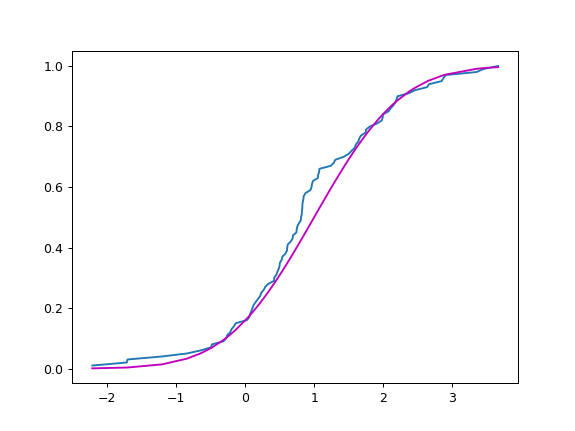

In [20]:
y = [empirical_cdf(x, t) for t in sorted(x)]
plt.plot(sorted(x), y)
plt.plot(sorted(x), ss.norm(1,1).cdf(sorted(x)), "m")

In [38]:
def calc_distance_between_model_and_data(I):
    return 1. / len(I) * np.sum((abs(empirical_cdf(x, i) - ss.norm(1,1).cdf(i)) for i in I))

calc_distance_between_model_and_data(x)

0.037919028474641618

In [43]:
def fidelity(I, Td):
    return np.exp(-calc_distance_between_model_and_data(I) / Td ** 2)

fidelity(x, 1)

0.96279089638255066

In [17]:
ss.norm(1, 1).cdf(0)

0.15865525393145707